In [ ]:
########################################
# Exploratory Analysis                 #
########################################

import pandas as pd

# Load the data
data = pd.read_csv('Restaurant_Scores.csv')

# Performing Exploratory Data Analysis

# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Data types and non-null counts
print(data.info())

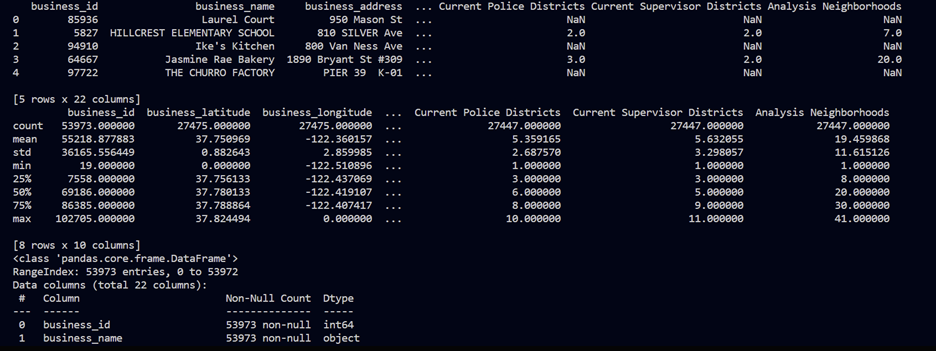

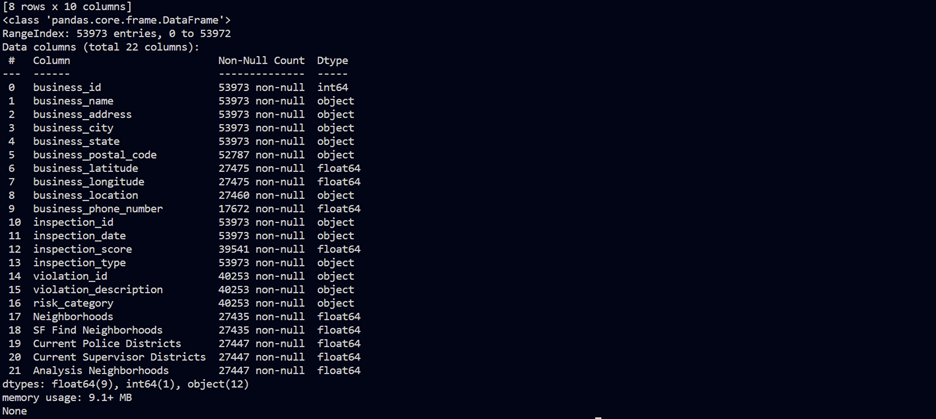

In [ ]:
Task 3: Data Preprocessing with Python
a. Preprocess the data from the first dataset using Python.
b. Handle missing values, outliers, and perform feature engineering when necessary to prepare the data for machine learning models.

In [ ]:
########################################
# Data Preprocessing                  #
########################################

import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats

# Load the data
data = pd.read_csv('Restaurant_Scores.csv')

# Handling Missing Values
data.dropna(inplace=True)  # Remove rows with missing values

# Drop non-numerical values
data = data.drop(['business_id', 'business_name', 'business_address', 'business_city', 'business_state', 
                  'business_postal_code', 'business_location', 'inspection_id', 'inspection_date', 'inspection_type', 
                  'violation_id', 'violation_description', 'risk_category'], axis='columns')
 
# Print the dataset
print(data.head())

# Review data types
print(data.dtypes)
print("\n")


# IQR (Interquartile Range) Method to determine outliers
Q1 = data['inspection_score'].quantile(0.25)
Q3 = data['inspection_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['inspection_score'] < lower_bound) | (data['inspection_score'] > upper_bound)]

# Remove outliers
data = data[~((data['inspection_score'] < lower_bound) | (data['inspection_score'] > upper_bound))]

print(data.head())

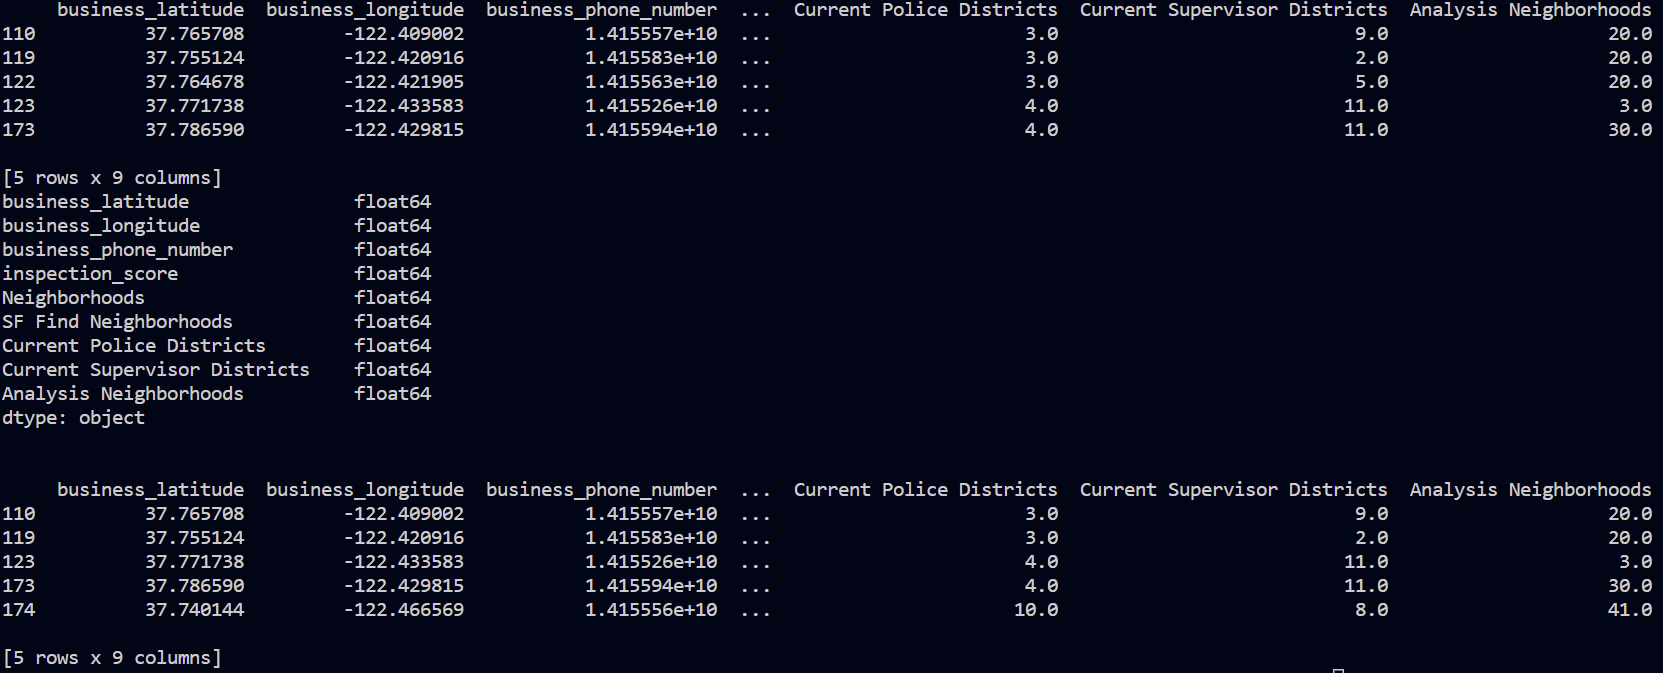

In [ ]:
Task 4: Implement Machine Learning Models with Python
a. Implement at least two different machine learning models (e.g., SVM, Random Forest, Neural Network) for the first dataset using Python.
b. Evaluate and compare the performance of each model using appropriate metrics to determine the most suitable model for the dataset.

In [ ]:
########################################
# Machine Learning Models              #
########################################

import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('Restaurant_Scores.csv')

# Handling Missing Values
data.dropna(inplace=True)  # Remove rows with missing values

# Drop non-numerical values
data = data.drop(['business_id', 'business_name', 'business_address', 'business_city', 'business_state', 
                  'business_postal_code', 'business_location', 'inspection_id', 'inspection_date', 'inspection_type', 
                  'violation_id', 'violation_description', 'risk_category'], axis='columns')
 
# Print the dataset
print(data.head())

# Review data types
print(data.dtypes)
print("\n")


# IQR (Interquartile Range) Method to determine outliers
Q1 = data['inspection_score'].quantile(0.25)
Q3 = data['inspection_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['inspection_score'] < lower_bound) | (data['inspection_score'] > upper_bound)]

# Remove outliers
data = data[~((data['inspection_score'] < lower_bound) | (data['inspection_score'] > upper_bound))]

print(data.head())

# Set the target column to inspection_score
X = data.drop('inspection_score', axis=1)
y = data['inspection_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test_scaled)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test_scaled)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

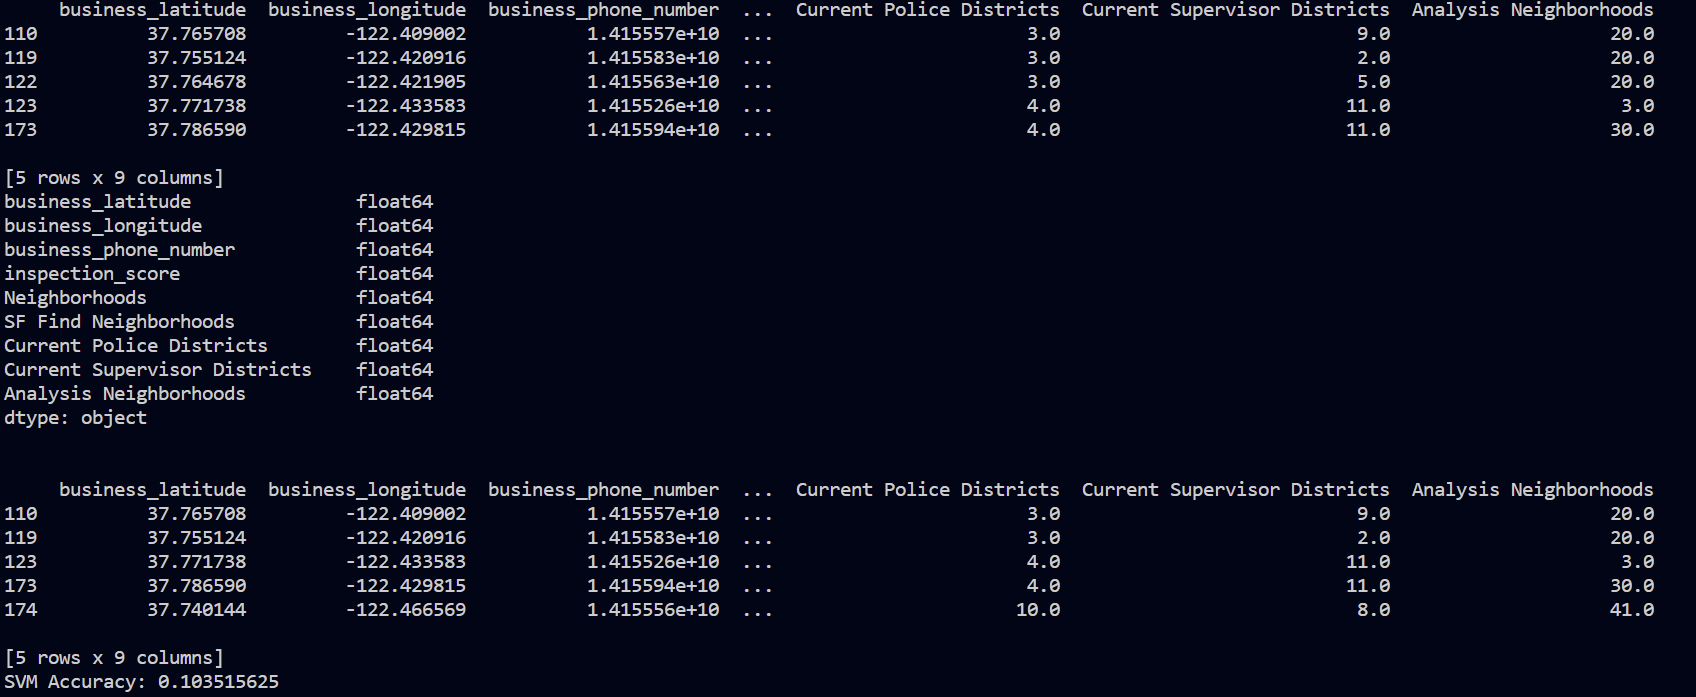

In [ ]:
5. Task 5: Visualization with Python
a. Create meaningful visualizations (e.g., scatter plots, heatmaps, bar charts) for the first dataset using Python.
b. Use libraries like Matplotlib, Seaborn, or Plotly to create clear and insightful visual representations of the dataset.

In [ ]:
########################################
# Visualization                        #
########################################

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Restaurant_Scores.csv')

# Pairplot to visualize relationships between features
sns.pairplot(data, hue='inspection_score', diag_kind='kde')
plt.title('Pairplot of Features with Inspection Score')
plt.show()

# Heatmap of correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Bar chart of target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='inspection_score', data=data)
plt.title('Inspection Score Distribution')
plt.xlabel('Inspection Score')
plt.ylabel('Count')
plt.show()

# Box plots to visualize feature distributions by target class
plt.figure(figsize=(10, 6))
sns.boxplot(x='inspection_score', y='Current Police Districts', data=data)
plt.title('Box Plot of Current Police Districts by Inspection Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='inspection_score', y='Neighborhoods', data=data)
plt.title('Box Plot of Neighborhoods by Inspection Score')
plt.show()

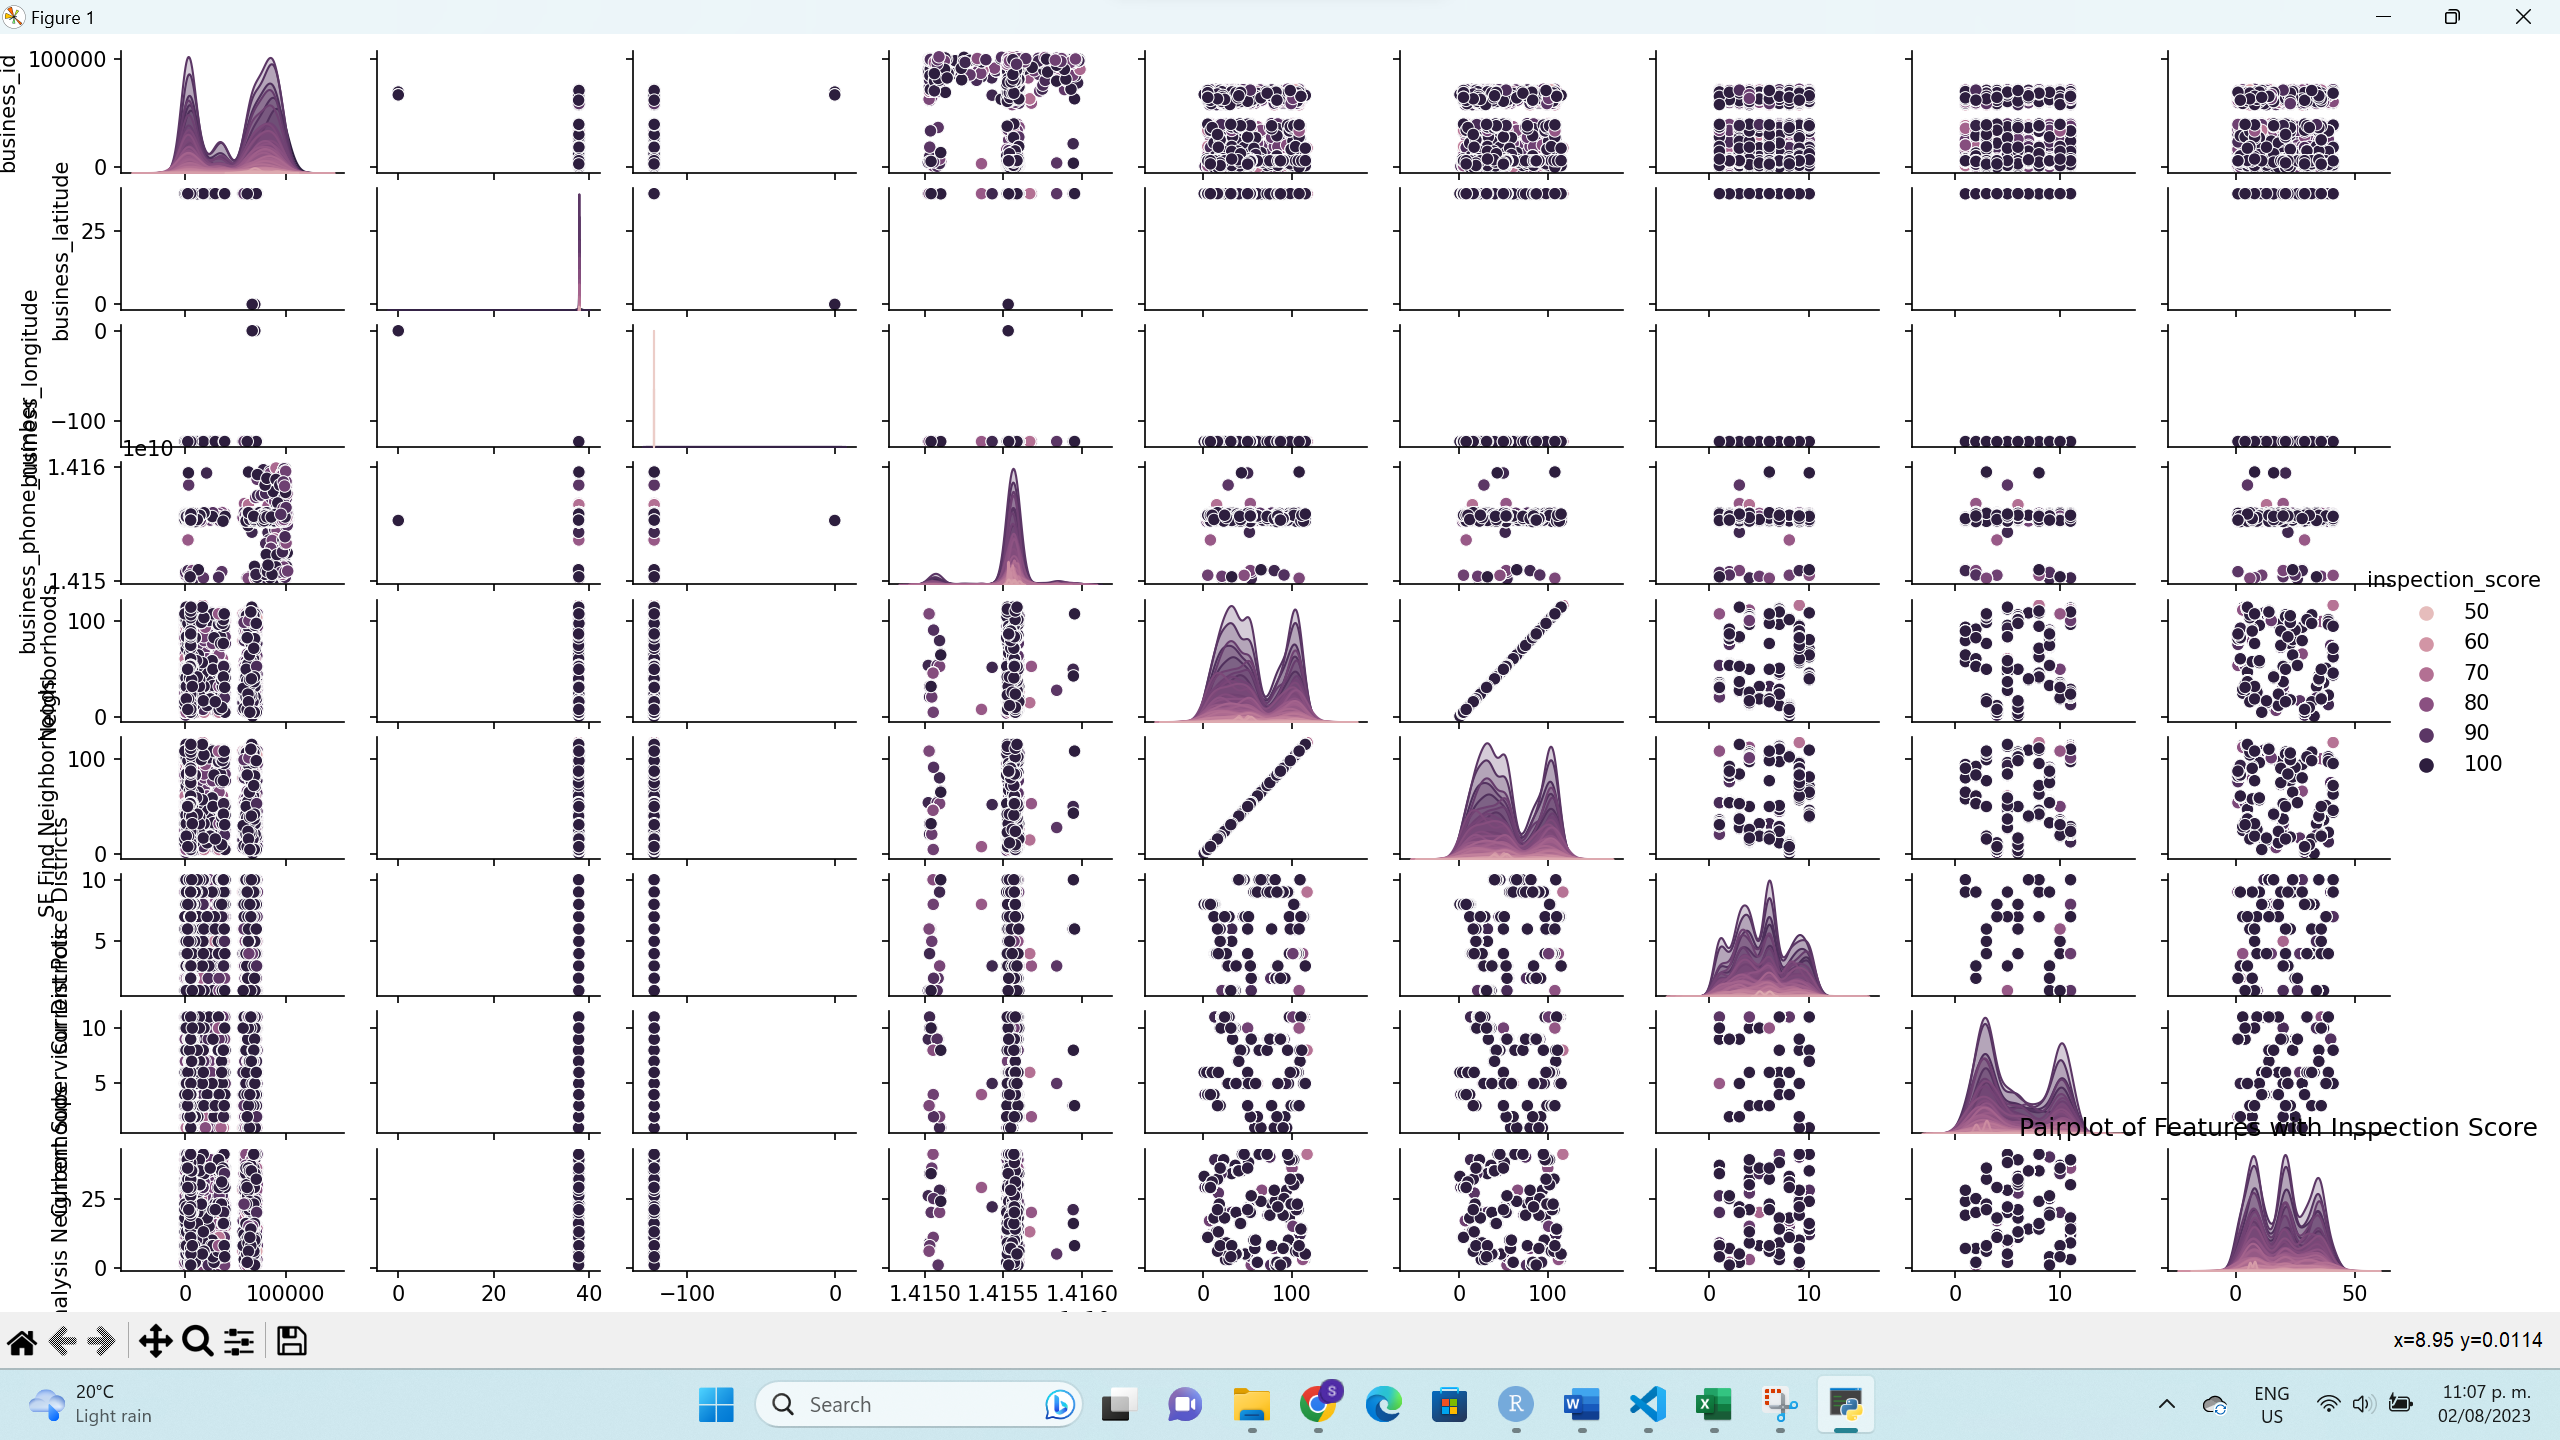